In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/HurricaneHarvey"
IMG_SIZE = (128, 128)  # Resize images
BATCH_SIZE = 16
NUM_CLASSES = 5  # Adjust based on dataset categories
EPOCHS = 3

In [3]:
def load_datasets(dataset_path, img_size, batch_size):
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "train_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    val_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "validation_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    test_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "test_another"),
        image_size=img_size,
        batch_size=batch_size
    )

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
    val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
    test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))
    return train_dataset, val_dataset, test_dataset

# Load datasets
train_ds, val_ds, test_ds = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.


In [4]:
# Load datasets
train_ds, val_ds, test_ds = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)

Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.


In [5]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

In [6]:
# VGG16 Architecture

def create_vgg16(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [7]:
def compile_and_train(model, train_dataset, val_dataset, epochs):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
    return history

def evaluate_model(model, test_dataset):
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy

def plot_training(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

Training VGG16...
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 312ms/step - accuracy: 0.8229 - loss: 0.8951 - val_accuracy: 0.9080 - val_loss: 0.2210
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 330ms/step - accuracy: 0.8910 - loss: 0.2734 - val_accuracy: 0.9050 - val_loss: 0.2279
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 349ms/step - accuracy: 0.8881 - loss: 0.2608 - val_accuracy: 0.9035 - val_loss: 0.2085


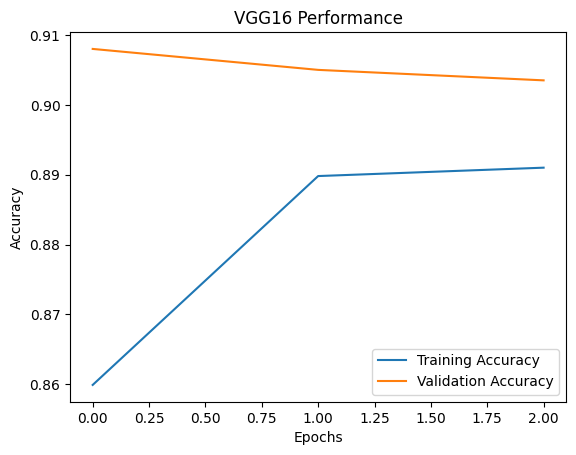

563/563 ━━━━━━━━━━━━━━━━━━━━ 133s 237ms/step - accuracy: 0.8539 - loss: 0.2653
Test Accuracy: 85.72%


0.8572221994400024

In [8]:
input_shape = IMG_SIZE + (3,)  # Input shape for the models

# Train and evaluate VGG16
print("Training VGG16...")
vgg16 = create_vgg16(input_shape, NUM_CLASSES)
vgg16_history = compile_and_train(vgg16, train_ds, val_ds, EPOCHS)
plot_training(vgg16_history, "VGG16 Performance")
evaluate_model(vgg16, test_ds)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# test
img_path = ""  # Update path as needed
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict with your trained model
prediction = vgg16.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

def load_datasets(dataset_path, img_size, batch_size):
    raw_train = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "train_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    class_names = raw_train.class_names  #capture this BEFORE mapping

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = raw_train.map(lambda x, y: (normalization_layer(x), y))

    val_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "validation_another"),
        image_size=img_size,
        batch_size=batch_size
    ).map(lambda x, y: (normalization_layer(x), y))

    test_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "test_another"),
        image_size=img_size,
        batch_size=batch_size
    ).map(lambda x, y: (normalization_layer(x), y))

    return train_dataset, val_dataset, test_dataset, class_names

train_ds, val_ds, test_ds, class_names = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.
Predicted class: no_damage
